In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_ramses import Brug

plt.style.use("classic")

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](../figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(0.306, 0.142, 2, 2, 0.05, 0.05, 5)
brug.__dict__

{'h1': 0.306,
 'h2': 0.142,
 'd1a': 2,
 'd2a': 2,
 'd1b': 0.05,
 'd2b': 0.05,
 'N': 5,
 'cosa': 0.9874941595586667,
 'sina': 0.15765558929997497,
 'cosb': 0.997266807920802,
 'sinb': 0.07388446263900203}

In [4]:
brug.calc_reactie_krachten()

[68.55, 137.1, 337.1, 137.1, 137.1, 137.1, 68.55]

In [5]:
brug.calc_touw_kracht()

([593.9795527984259,
  1460.4705123876686,
  593.9795527984259,
  593.9795527984259,
  593.9795527984259],
 [588.1588905065565,
  1446.1587307787036,
  588.1588905065565,
  588.1588905065565,
  588.1588905065565])

In [6]:
brug.calc_kant()

(-210.94127747252745,
 -3788.411458333333,
 (586.5513392857142,
  1442.9162086085678,
  587.7057025594547,
  589.1454759435048,
  591.1552676158897),
 -97.88778235653234,
 -3788.411458333333,
 (586.5513392857141,
  1442.3590484719575,
  586.8001169543152,
  587.110940800173,
  587.5458179383095))

### Wegdek

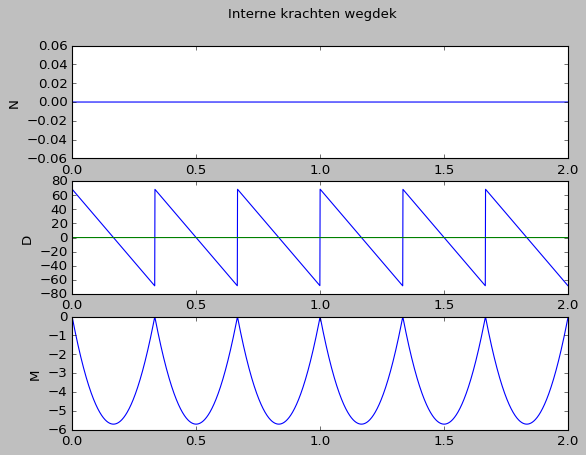

In [7]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten wegdek")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")
plt.savefig("figs/wegdek-ramses")

### Doorbuiging wegdek

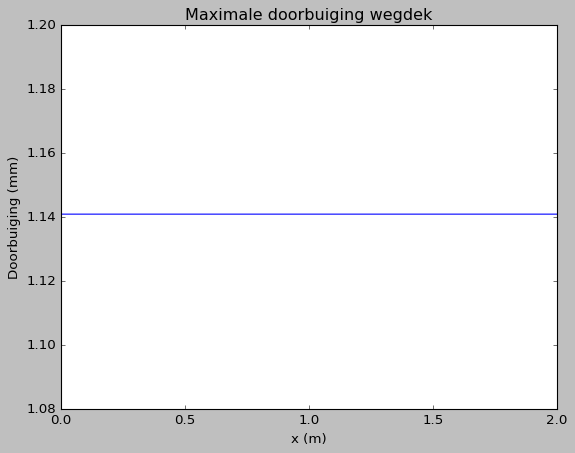

In [8]:
x = np.arange(0, 2, 0.001)
f = [brug.calc_doorbuiging_wegdek(xi)*10**3 for xi in x]

plt.plot(x, f)
plt.title("Maximale doorbuiging wegdek")
plt.xlabel("x (m)")
plt.ylabel("Doorbuiging (mm)")
plt.savefig("figs/wegdek-doorbuiging-ramses")

### Piloon 1

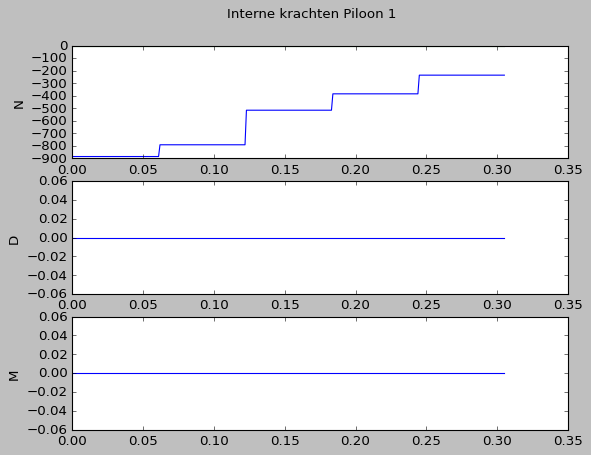

In [9]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten Piloon 1")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")
plt.savefig("figs/piloon1-ramses")

### Piloon 2

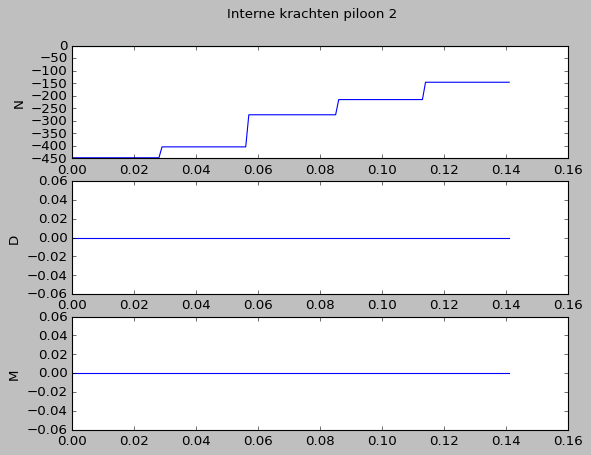

In [10]:
x = np.arange(0, brug.h2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten piloon 2")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")
plt.savefig("figs/piloon2-ramses")

### Traagheidsmoment

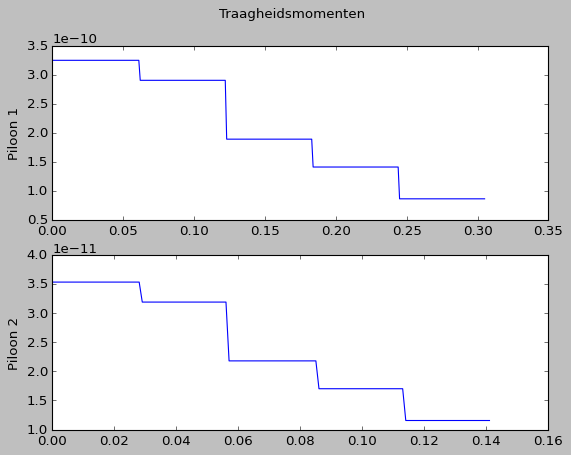

In [11]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
I1 = [brug.calc_piloon_I(xi, True) for xi in x1]
x2 = np.arange(0, brug.h2, step)
I2 = [brug.calc_piloon_I(xi, False) for xi in x2]

fig = plt.figure()
fig.suptitle("Traagheidsmomenten")
ax1 = plt.subplot(2,1,1)
ax1.plot(x1, I1)
ax1.set_ylabel("Piloon 1")
ax2 = plt.subplot(2,1,2)
ax2.plot(x2, I2)
ax2.set_ylabel("Piloon 2")
plt.savefig("figs/traagheid-ramses")

### Kleine balk uit I

Text(0, 0.5, 'Piloon 2 breette')

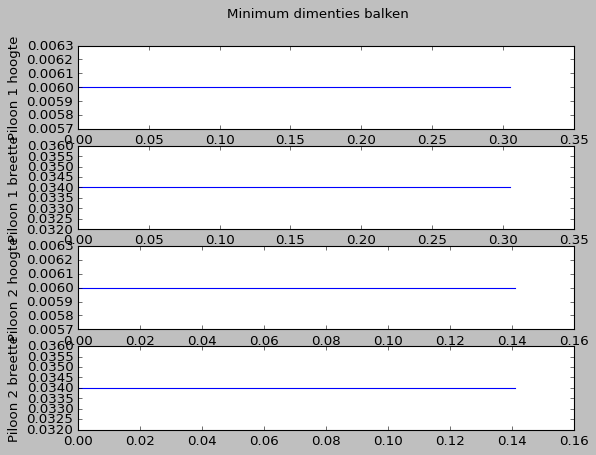

In [12]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
hb1 = list(zip(*[brug.calc_piloon_balk(xi, True) for xi in x1]))
x2 = np.arange(0, brug.h2, step)
hb2 = list(zip(*[brug.calc_piloon_balk(xi, False) for xi in x2]))

fig = plt.figure()
fig.suptitle("Minimum dimenties balken")
ax1 = plt.subplot(4,1,1)
ax1.plot(x1, hb1[0])
ax1.set_ylabel("Piloon 1 hoogte")
ax2 = plt.subplot(4,1,2)
ax2.plot(x1, hb1[1])
ax2.set_ylabel("Piloon 1 breette")
ax3 = plt.subplot(4,1,3)
ax3.plot(x2, hb2[0])
ax3.set_ylabel("Piloon 2 hoogte")
ax4 = plt.subplot(4,1,4)
ax4.plot(x2, hb2[1])
ax4.set_ylabel("Piloon 2 breette")